# Image Classification using Tensorflow


We will now work on an image classification problem. Using the online MNIST clothes database, we will try to classify images of different types of clothing

I will start with a quick brainstorm of what I think the process will be based on my previous experience:
1. We will first download our data and have to split it into training and test sets.
2. Any preprocessing to the data, make it neural network friendly
3. Setup our model layers, optimizer and loss function
4. Train the model using our train dataset, we will then decide what hyperparameters are best for our model
5. We now have a fully trained model

**Goals** My main goals really are to understand how to use the tensorflow API, but also get accustomed to when we may want to use certain feature representations, when we want to use certain layers, and what affects the decision to choose values for certain hyperparameters.



First, lets begin with acquiring our data. In most cases, this is that hardest step of the process, but thanks to MNIST, we have a number of toy datasets that can be used.


In [1]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()


In [3]:
train_images[1].shape


(28, 28)

We can see that these are 28x28 arrays. Where each element of the array represents an RGB colour value between 0 and 255. The corresponding labels range from 0-9 and represent an item of clothing according to the table below:

<div class="devsite-table-wrapper"><table>
  <tbody><tr>
    <th>Label</th>
    <th>Class</th>
  </tr>
  <tr>
    <td>0</td>
    <td>T-shirt/top</td>
  </tr>
  <tr>
    <td>1</td>
    <td>Trouser</td>
  </tr>
    <tr>
    <td>2</td>
    <td>Pullover</td>
  </tr>
    <tr>
    <td>3</td>
    <td>Dress</td>
  </tr>
    <tr>
    <td>4</td>
    <td>Coat</td>
  </tr>
    <tr>
    <td>5</td>
    <td>Sandal</td>
  </tr>
    <tr>
    <td>6</td>
    <td>Shirt</td>
  </tr>
    <tr>
    <td>7</td>
    <td>Sneaker</td>
  </tr>
    <tr>
    <td>8</td>
    <td>Bag</td>
  </tr>
    <tr>
    <td>9</td>
    <td>Ankle boot</td>
  </tr>
</tbody></table></div>

We now may want to store the class names as well for later use in identifying items

In [4]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

Let us now plot the data to see what we are looking at

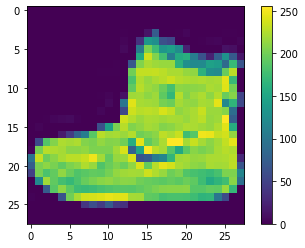

In [5]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

It's a shoe. Brilliant. But we want to scale our values between 0 and 1 before feeding them into the neural network. This is known as normalizing the dataset. We do this so that the model can be used further on images or data that is not represented in the same format as this dataset. It makes it so that the model is **not** sensitive to the magnitude of the data.

In [6]:
train_images = train_images/255.0
test_images = test_images/255.0

Let us now plot the first few images so that we can ensure that everything is in the proper format

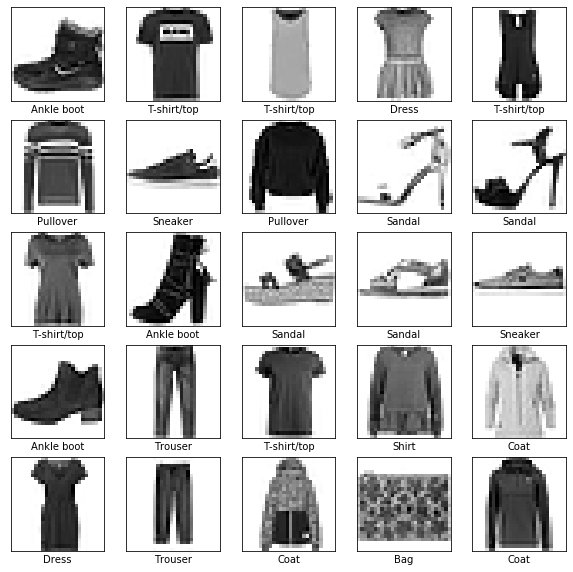

In [7]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)  
    plt.xticks([]) #removing xticks
    plt.yticks([]) #removing yticks
    plt.grid(False) #no grid
    plt.imshow(train_images[i], cmap=plt.cm.binary) #show the image as black and white
    plt.xlabel(class_names[train_labels[i]]) #the label will be the name of the item, rather than a number
plt.show()

## Building the Model
Now that we have dealt with a little bit of data preprocessing, let us now build our actual nueral network for classifying the data. Right now we are only using a normal densely connected neural network, however, classifying images is a task that is performed especially well by convolution nueral nets. However, before we delve into that, let us just build a simple model right now


In [8]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10)
])

Now we will compile our model and introduce our loss function and optimizer, as well as the loss metric

In [9]:
model.compile(optimizer='adam', 
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
weights = model.get_weights()
reset_model = lambda model:model.set_weights(weights)

Now we very simply feed our training data into the model to fit the coefficients of the model to our data. We will also test the model on our training set after each epoch to see if the validation accuracy increases or not.


Train on 60000 samples
60000/60000 [==============================] - 9s 145us/sample - loss: 0.5017 - accuracy: 0.8240
10000/10000 - 2s - loss: 0.4237 - accuracy: 0.8498


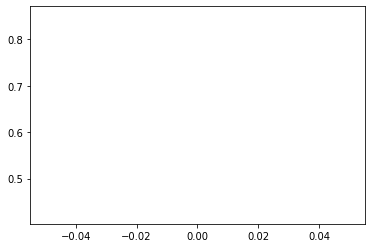

Train on 60000 samples
60000/60000 [==============================] - 14s 231us/sample - loss: 0.3758 - accuracy: 0.8645
10000/10000 - 1s - loss: 0.3986 - accuracy: 0.8583


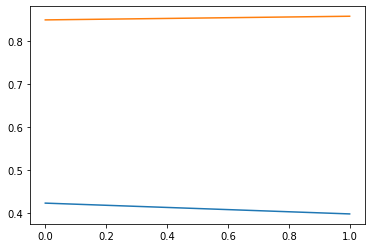

Train on 60000 samples
60000/60000 [==============================] - 13s 224us/sample - loss: 0.3365 - accuracy: 0.8776
10000/10000 - 1s - loss: 0.3730 - accuracy: 0.8646


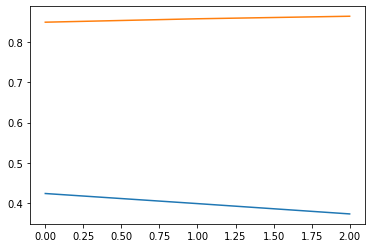

Train on 60000 samples
60000/60000 [==============================] - 15s 248us/sample - loss: 0.3145 - accuracy: 0.8846
10000/10000 - 1s - loss: 0.3859 - accuracy: 0.8634


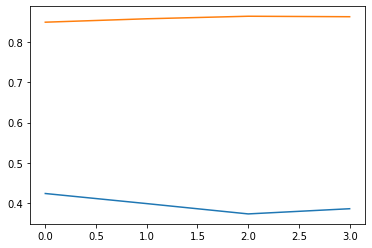

Train on 60000 samples
60000/60000 [==============================] - 13s 217us/sample - loss: 0.2962 - accuracy: 0.8906
10000/10000 - 1s - loss: 0.3482 - accuracy: 0.8744


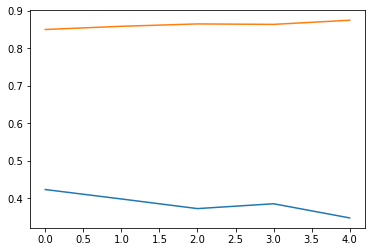

Train on 60000 samples
60000/60000 [==============================] - 13s 211us/sample - loss: 0.2823 - accuracy: 0.8955
10000/10000 - 1s - loss: 0.3499 - accuracy: 0.8778


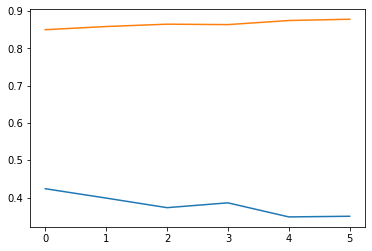

Train on 60000 samples
60000/60000 [==============================] - 13s 209us/sample - loss: 0.2699 - accuracy: 0.8994
10000/10000 - 1s - loss: 0.3461 - accuracy: 0.8773


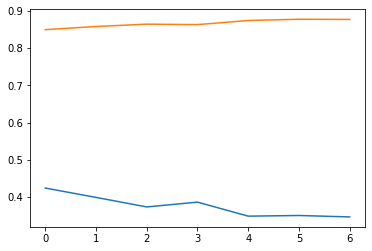

Train on 60000 samples
60000/60000 [==============================] - 13s 210us/sample - loss: 0.2597 - accuracy: 0.9046
10000/10000 - 1s - loss: 0.3407 - accuracy: 0.8771


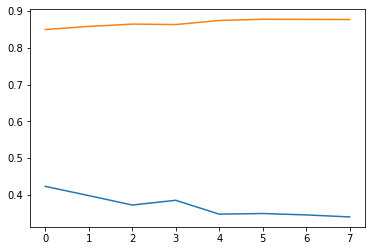

Train on 60000 samples
60000/60000 [==============================] - 15s 254us/sample - loss: 0.2487 - accuracy: 0.9075
10000/10000 - 1s - loss: 0.3348 - accuracy: 0.8819


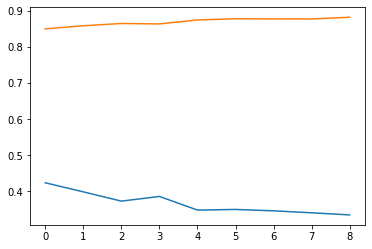

Train on 60000 samples
60000/60000 [==============================] - 12s 204us/sample - loss: 0.2390 - accuracy: 0.9102
10000/10000 - 1s - loss: 0.3286 - accuracy: 0.8832


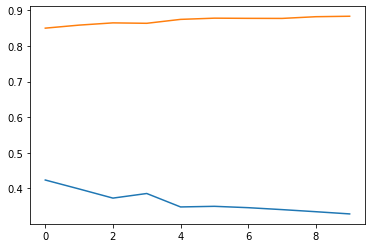

Train on 60000 samples
60000/60000 [==============================] - 12s 200us/sample - loss: 0.2314 - accuracy: 0.9120
10000/10000 - 1s - loss: 0.3401 - accuracy: 0.8833


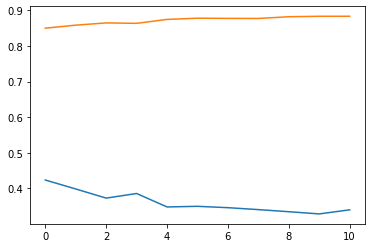

In [10]:
loss = []
val_acc = []
epochs = 12
for e in range(1,epochs):
    model.fit(train_images,train_labels, epochs=1)
    test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
    loss.append(test_loss)
    val_acc.append(test_acc)
    plt.plot(loss)
    plt.plot(val_acc)
    plt.show()
    

In [11]:
optimum_epoch = min(range(len(loss)), key=loss.__getitem__)


In [12]:
reset_model(model)
model.fit(train_images,train_labels, epochs=optimum_epoch)
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

Train on 60000 samples
Epoch 1/9
60000/60000 [==============================] - 14s 231us/sample - loss: 0.4820 - accuracy: 0.8295
Epoch 2/9
60000/60000 [==============================] - 12s 206us/sample - loss: 0.3709 - accuracy: 0.8662
Epoch 3/9
60000/60000 [==============================] - 12s 204us/sample - loss: 0.3342 - accuracy: 0.8799
Epoch 4/9
60000/60000 [==============================] - 12s 208us/sample - loss: 0.3122 - accuracy: 0.8870
Epoch 5/9
60000/60000 [==============================] - 14s 231us/sample - loss: 0.2966 - accuracy: 0.8913
Epoch 6/9
60000/60000 [==============================] - 13s 221us/sample - loss: 0.2817 - accuracy: 0.8960
Epoch 7/9
60000/60000 [==============================] - 13s 210us/sample - loss: 0.2703 - accuracy: 0.8996
Epoch 8/9
60000/60000 [==============================] - 14s 233us/sample - loss: 0.2585 - accuracy: 0.9052
Epoch 9/9
60000/60000 [==============================] - 13s 218us/sample - loss: 0.2499 - accuracy: 0.9063
10000

In order to make predictions, we will adapt the model to output probabilities from the classification logits. This is done by running the output through a softmax function.

In [13]:
probability_model = tf.keras.Sequential([
    model,
    tf.keras.layers.Softmax()
])

In [15]:
predictions = probability_model.predict(test_images)

In [17]:
np.argmax(predictions[0])

9

In [19]:
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array, true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array, true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

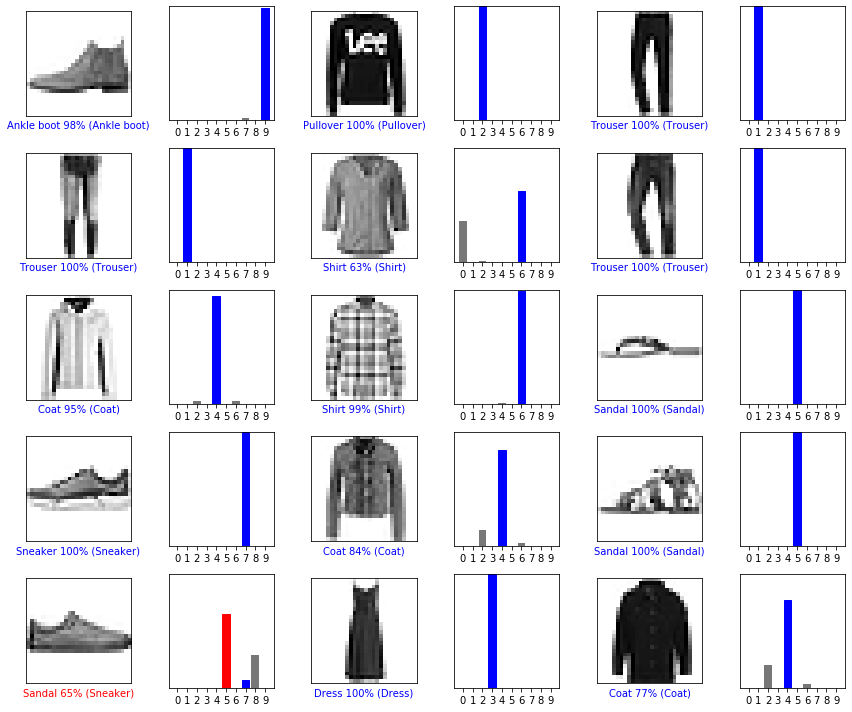

In [20]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions[i], test_labels, test_images)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

And that's it! We have trained a model using keras and tensorflow to classify clothing. After learning a bit more about the implementation of CNN's I will come back to this library and attempt to implement a CNN to better classify these images!
